In [2]:
from src.scripts.disease_plotting import *
import seaborn as sns

In [3]:
diseases = load_uniprotid_diseases()

In [4]:
_, pct = quantify_missing_diseases(diseases)
pct

77.14329454990815

In [5]:
diseases_df = add_keywords_when_comments_missing(diseases).drop(
    columns=["comments", "keywords"]
)
diseases_df

/Users/wesleymonteith/code/ada-2024-project-standarddeviants/src/scripts/disease_plotting.py:47: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,UniProt (SwissProt) Primary ID of Target Chain,comments_bfill
0,P07949,"[Hirschsprung disease 1, Medullary thyroid car..."
1,O60674,"[Budd-Chiari syndrome, Polycythemia vera, Thro..."
2,P00533,"[Lung cancer, Inflammatory skin and bowel dise..."
3,Q06187,"[X-linked agammaglobulinemia, Growth hormone d..."
4,O60885,[Cornelia de Lange syndrome 6]
...,...,...
6527,P0A879,NaN
6528,Q9Y6I4,NaN
6529,Q8TEY7,NaN
6530,P12318,NaN


In [6]:
doi_metadata = pd.read_csv("../src/data/metadata.csv").dropna()
doi_metadata

,Article DOI,journal,year,publisher
0,10.1021/jm9602571,Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS)
1,10.1016/j.chembiol.2013.07.014,Chemistry &amp; Biology,2013.0,Elsevier BV
3,10.1021/jm9507183,Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS)
4,10.1126/science.2200122,Science,1990.0,American Association for the Advancement of Sc...
5,10.1021/ja00082a004,Journal of the American Chemical Society,1994.0,American Chemical Society (ACS)
...,...,...,...,...
40733,10.1016/j.bmcl.2005.03.007,Bioorganic &amp; Medicinal Chemistry Letters,2005.0,Elsevier BV
40734,10.1016/j.bmcl.2005.03.089,Bioorganic &amp; Medicinal Chemistry Letters,2005.0,Elsevier BV
40735,10.1016/j.bmcl.2005.05.043,Bioorganic &amp; Medicinal Chemistry Letters,2005.0,Elsevier BV
40736,10.1021/jm050105i,Journal of Medicinal Chemistry,2005.0,American Chemical Society (ACS)


In [7]:
doi_metadata.describe(include="all")

,Article DOI,journal,year,publisher
count,40719,40719,40719.000000,40719
unique,40719,195,NaN,33
top,10.1021/jm9602571,Journal of Medicinal Chemistry,NaN,Elsevier BV
freq,1,13877,NaN,21918
mean,NaN,NaN,2008.964709,NaN
std,NaN,NaN,8.519787,NaN
min,NaN,NaN,1965.000000,NaN
25%,NaN,NaN,2004.000000,NaN
50%,NaN,NaN,2010.000000,NaN
75%,NaN,NaN,2016.000000,NaN


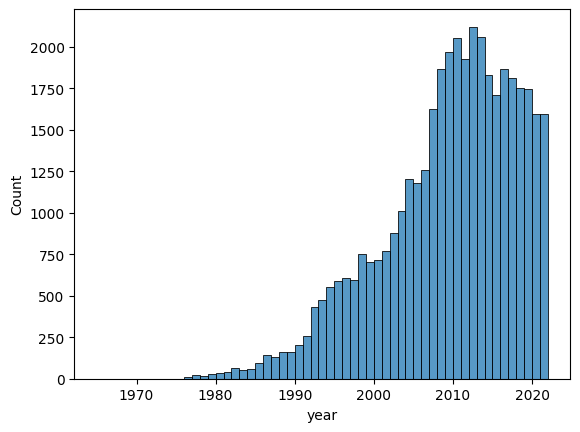

In [8]:
ax = sns.histplot(doi_metadata, x="year", binwidth=1)

In [9]:
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    # "BindingDB Ligand Name",
    # "Target Name",
    # "Target Source Organism According to Curator or DataSource",
    # # 'Ki (nM)',
    # # 'IC50 (nM)',
    # # 'Kd (nM)',
    # # 'EC50 (nM)',
    # # 'kon (M-1-s-1)',
    # # 'koff (s-1)',
    # # 'pH',
    # # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # # 'BindingDB Entry DOI',
    # "PMID",
    # # # 'PubChem AID',
    # # "Patent Number",
    # # "Authors",
    # # "Institution",
    # # 'Link to Ligand in BindingDB',
    # # 'Link to Target in BindingDB',
    # # 'Link to Ligand-Target Pair in BindingDB',
    # # 'Ligand HET ID in PDB',
    # # 'PDB ID(s) for Ligand-Target Complex',
    # # 'PubChem CID',
    # # 'PubChem SID',
    # "ChEBI ID of Ligand",
    # "ChEMBL ID of Ligand",
    # "DrugBank ID of Ligand",
    # "IUPHAR_GRAC ID of Ligand",
    # "KEGG ID of Ligand",
    # "ZINC ID of Ligand",
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    # "UniProt (TrEMBL) Primary ID of Target Chain",
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

bindingdb_df = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_52862/1163243924.py:198: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [10]:
bindingdb_df.dropna()

,Article DOI,UniProt (SwissProt) Primary ID of Target Chain
0,10.1021/jm9602571,P03367
1,10.1021/jm9602571,P03367
2,10.1021/jm9602571,P03367
3,10.1021/jm9602571,P03367
4,10.1021/jm9602571,P03367
...,...,...
2876547,10.1016/j.bmcl.2005.08.100,P0DTD1
2876548,10.1016/j.bmcl.2005.08.100,P0DTD1
2876549,10.1016/j.bmcl.2005.08.100,P0DTD1
2876550,10.1016/j.bmcl.2005.08.100,P0DTD1


In [49]:
# from src.utils.utils import group_categories

# def sort_diseases(disease_name: str) -> str:
#     """"""
#     in_mapping = {
#         "Neurodegeneration": [
#             "parkinson",
#             "alzheimer",
#         ],
#         "Cancer": [
#             "leukemia",
#             "oncogene",
#             "hemangioma",
#             "glioma"
#         ],
#         "Obesity": [],
#         "Neoplasia": [],
#         "Hirschsprung Disease": [],
#         "Immunodeficiency": [],
#         "Agammaglobulinemia": [],
#         "Thrombocythemia": [],
#         "Diabetes": [],
#         "Cornelia de Lange syndrome": [],
#         "QT syndrome": [],
#         "Inflammatory skin and bowel disease": [],
#         "Osteopetrosis":[],
#         "Pregnancy loss":[],
#         "Thrombophilia":[],
#         "Periodic fever":[],
#         "Lipodystrophy":[],
#         "Schizophrenia":[],

#     }

#     endswith_mapping = {"Cancer": ["oma"]}

#     return group_categories(disease_name, in_mapping=in_mapping, endswith_mapping=endswith_mapping)

In [50]:
data = (
    bindingdb_df.dropna()
    .merge(diseases_df.dropna(), how="inner")
    .rename(columns={"comments_bfill": "diseases"})
    .merge(doi_metadata.dropna(), how="inner")
)
data["Disease Classes"] = data["diseases"].apply(
    lambda l: [sort_diseases(l_i) for l_i in l]
)
data

,Article DOI,UniProt (SwissProt) Primary ID of Target Chain,diseases,journal,year,publisher,Disease Classes
0,10.1021/jm9602571,P03367,[AIDS],Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS),[AIDS]
1,10.1021/jm9602571,P03367,[AIDS],Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS),[AIDS]
2,10.1021/jm9602571,P03367,[AIDS],Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS),[AIDS]
3,10.1021/jm9602571,P03367,[AIDS],Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS),[AIDS]
4,10.1021/jm9602571,P03367,[AIDS],Journal of Medicinal Chemistry,1996.0,American Chemical Society (ACS),[AIDS]
...,...,...,...,...,...,...,...
598292,10.1021/jm050105i,Q14524,"[Progressive familial heart block 1A, Long QT ...",Journal of Medicinal Chemistry,2005.0,American Chemical Society (ACS),"[Progressive familial heart block 1A, QT syndr..."
598293,10.1021/jm050105i,Q14524,"[Progressive familial heart block 1A, Long QT ...",Journal of Medicinal Chemistry,2005.0,American Chemical Society (ACS),"[Progressive familial heart block 1A, QT syndr..."
598294,10.1021/jm050105i,Q13936,"[Timothy syndrome, Brugada syndrome 3, Long QT...",Journal of Medicinal Chemistry,2005.0,American Chemical Society (ACS),"[Timothy syndrome, Brugada syndrome 3, QT synd..."
598295,10.1021/jm050105i,Q13936,"[Timothy syndrome, Brugada syndrome 3, Long QT...",Journal of Medicinal Chemistry,2005.0,American Chemical Society (ACS),"[Timothy syndrome, Brugada syndrome 3, QT synd..."


In [51]:
df = (
    data.explode(["Disease Classes", "diseases"])
    .value_counts(subset=["year", "Disease Classes", "diseases"])
    .reset_index()
)
df["Disease Classes"] = df["Disease Classes"].replace(
    {
        k: "Other"
        for k in data.explode(["Disease Classes"])["Disease Classes"]
        .value_counts()
        .index[20:]
    }
)
df

,year,Disease Classes,diseases,count
0,2011.0,Cancer,Hepatocellular carcinoma,2460
1,2007.0,Obesity,Obesity,2097
2,2011.0,Cancer,Colorectal cancer,2070
3,2011.0,Cancer,Proto-oncogene,1976
4,2011.0,Cancer,"Leukemia, acute myelogenous",1887
...,...,...,...,...
15765,2000.0,Inflammatory skin and bowel disease,"Inflammatory skin and bowel disease, neonatal, 1",1
15766,2005.0,Other,Curry-Jones syndrome,1
15767,2012.0,Other,Lethal congenital contracture syndrome 10,1
15768,2012.0,Other,Leber congenital amaurosis 11,1


In [52]:
df["Disease Classes"].unique()

array(['Cancer', 'Obesity', 'QT syndrome', 'Other', 'AIDS',
       'Inflammatory skin and bowel disease', 'Osteopetrosis',
       'Cornelia de Lange syndrome', 'Ischemic stroke',
       'Factor II deficiency', 'Pregnancy loss', 'Thrombophilia',
       'Vitamin D-dependent rickets 3', 'Diabetes', 'Immunodeficiency',
       'Agammaglobulinemia', 'Schizophrenia', 'Factor X deficiency',
       'Lipodystrophy', 'Neurodegeneration', 'Periodic fever'],
      dtype=object)

In [53]:
import plotly.express as px

# df = px.data.gapminder()
# fig = px.area(
#     df,
#     x="year",
#     y="pop",
#     color="continent",
#     line_group="country"
# )
fig = px.area(df, x="year", y="count", color="Disease Classes", line_group="diseases")
fig.show()